In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
import matplotlib.ticker as ticker

In [2]:
df = pd.read_csv("/Users/giacomomiolo/Downloads/ML_BABD-master 8/Classification_assignment/stress_train.csv")

### Exploratory Data Analysis

In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15164 entries, 0 to 15163
Data columns (total 13 columns):
age                15164 non-null int64
workclass          14228 non-null object
education          15164 non-null object
education_years    15164 non-null int64
marital_status     15164 non-null object
occupation         14224 non-null object
relationship       15164 non-null object
race               2328 non-null object
sex                15164 non-null object
hours_week         15164 non-null int64
country            14901 non-null object
permit             15164 non-null object
stress             15164 non-null int64
dtypes: int64(4), object(9)
memory usage: 1.5+ MB


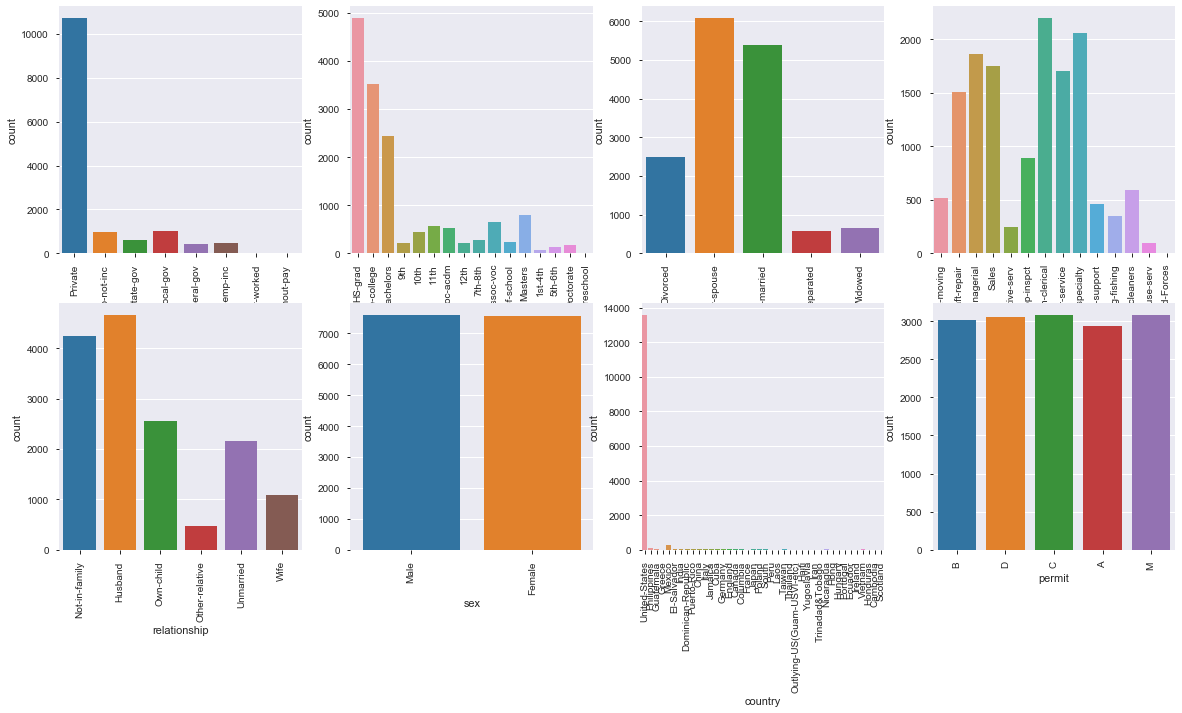

In [4]:
categorical = ["workclass", "education", "marital_status", "occupation", "relationship", "sex", "country", "permit"]
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for i, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[i], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [5]:
df.profile_report()

#### Missing data

In [6]:
for i in list(df):
    missing_count = df[i].isnull().sum()
    total = len(df[i])
    missing_perc = (missing_count/total)*100
    if missing_count != 0:
        print(f"{i} has {missing_count} missing values, {missing_perc:0.2f} % missing.")

workclass has 936 missing values, 6.17 % missing.
occupation has 940 missing values, 6.20 % missing.
race has 12836 missing values, 84.65 % missing.
country has 263 missing values, 1.73 % missing.


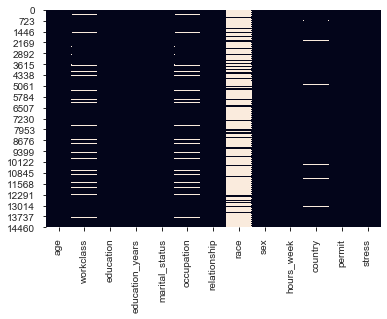

In [7]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

Dropping column "race" since it has 84.65% of missing values.

In [8]:
df.drop("race", axis=1, inplace=True)

Dropping rows where both "workclass" and "occupation" are empty. Losing 936 rows out of 15164, 6.17% of data.

In [9]:
df.dropna(how="all", subset=["workclass", "occupation"], inplace=True)

Filling missing values of "country" with "United States", the most common value.

In [10]:
df["country"].fillna(value="United States", inplace=True)

In [11]:
for i in list(df):
    missing_count = df[i].isnull().sum()
    total = len(df[i])
    missing_perc = (missing_count/total)*100
    if missing_count != 0:
        print(f"{i} has {missing_count} missing values, {missing_perc:0.2f} % missing.")

occupation has 4 missing values, 0.03 % missing.


In [12]:
df.loc[df["occupation"].isnull()]

,age,workclass,education,education_years,marital_status,occupation,relationship,sex,hours_week,country,permit,stress
1248,18,Never-worked,10th,6,Never-married,NaN,Own-child,Male,40,United-States,M,0
1681,17,Never-worked,10th,6,Never-married,NaN,Own-child,Male,30,United-States,M,0
6854,30,Never-worked,HS-grad,9,Married-civ-spouse,NaN,Wife,Female,40,United-States,M,0
8522,18,Never-worked,11th,7,Never-married,NaN,Own-child,Female,10,United-States,D,0


Likely incorrect data, "hours_week" is not 0, but "workclass" is Never-worked and "occupation" is NaN. Dropping as well.

In [13]:
df.dropna(how="all", subset=["occupation"], inplace=True)

In [14]:
for i in list(df):
    missing_count = df[i].isnull().sum()
    total = len(df[i])
    missing_perc = (missing_count/total)*100
    if missing_count != 0:
        print(f"{i} has {missing_count} missing values, {missing_perc:0.2f} % missing.")
    else:
        print(f"There are no missing values in column {i}.")

There are no missing values in column age.
There are no missing values in column workclass.
There are no missing values in column education.
There are no missing values in column education_years.
There are no missing values in column marital_status.
There are no missing values in column occupation.
There are no missing values in column relationship.
There are no missing values in column sex.
There are no missing values in column hours_week.
There are no missing values in column country.
There are no missing values in column permit.
There are no missing values in column stress.


### Duplicates

In [15]:
df.duplicated().sum()

349

Since there is no unique identifier for each observation, I cannot distinguish whether it is a duplicate or it is an observation with identical set of features. Not dropping anything.

### Target

In [16]:
df.groupby('stress').size()

stress
0    11107
1     3117
dtype: int64

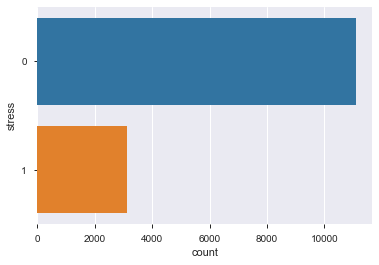

In [17]:
sns.countplot(y=df.stress ,data=df)
plt.show()

In [19]:
df.shape

(14224, 12)

In [25]:
age_group = pd.cut(df.age, bins=[0,19,35,65,90], labels=['Teen','Young Adult','Adult','Elderly'])
df.insert(1,'age_group', age_group)

In [26]:
df.drop("Age Group", axis=1, inplace=True)

In [27]:
df["age_group"].value_counts()

Adult          7209
Young Adult    5918
Teen            706
Elderly         391
Name: age_group, dtype: int64

In [33]:
dummy = pd.get_dummies(df, columns=["age_group", "workclass", "education", "marital_status", "occupation", "relationship", "sex", "permit"], drop_first=True)
df_prep = pd.concat([df,dummy], axis = 1)

In [34]:
original_vars = ["age", "age_group", "workclass", "education", "marital_status", "occupation", "relationship", "sex", "permit"]
for j in original_vars:
    df_prep.drop(j, axis=1, inplace=True)

In [37]:
cols = list(df_prep.columns)
for i,item in enumerate(df_prep.columns):
    if item in df_prep.columns[:i]: cols[i] = "toDROP"
df_prep.columns = cols
df_prep = df_prep.drop("toDROP",1)

In [38]:
df_prep.head()

,education_years,hours_week,stress,age_group_Young Adult,age_group_Adult,age_group_Elderly,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,sex_Male,permit_B,permit_C,permit_D,permit_M
0,9,16,0,0,1,0,0,1,0,0,...,1,0,0,0,0,1,1,0,0,0
1,10,40,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
2,10,65,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
3,9,35,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
4,10,45,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [41]:
df_prep.columns

Index(['education_years', 'hours_week', 'stress', 'age_group_Young Adult',
       'age_group_Adult', 'age_group_Elderly', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'education_11th', 'education_12th',
       'education_1st-4th', 'education_5th-6th', 'education_7th-8th',
       'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'marital_status_Married-civ-spouse',
       'marital_status_Never-married', 'marital_status_Separated',
       'marital_status_Widowed', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_O

In [43]:
df_prep.groupby('stress').size()

stress
0    11107
1     3117
dtype: int64

In [44]:
cols = list(df_prep.columns)

# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('stress')))

# use ix to reorder
df_ready = df_prep.ix[:, cols]

In [46]:
df_ready.columns

Index(['stress', 'education_years', 'hours_week', 'age_group_Young Adult',
       'age_group_Adult', 'age_group_Elderly', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'education_11th', 'education_12th',
       'education_1st-4th', 'education_5th-6th', 'education_7th-8th',
       'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'marital_status_Married-civ-spouse',
       'marital_status_Never-married', 'marital_status_Separated',
       'marital_status_Widowed', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_O

In [47]:
permits = ['permit_B', 'permit_C', 'permit_D', 'permit_M']
for a in permits:
    df_ready.drop(a, axis=1, inplace=True)

In [48]:
df_ready.columns

Index(['stress', 'education_years', 'hours_week', 'age_group_Young Adult',
       'age_group_Adult', 'age_group_Elderly', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'education_11th', 'education_12th',
       'education_1st-4th', 'education_5th-6th', 'education_7th-8th',
       'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'marital_status_Married-civ-spouse',
       'marital_status_Never-married', 'marital_status_Separated',
       'marital_status_Widowed', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_O

In [40]:
df_prep.to_csv("classass.csv")

In [49]:
# OVERSAMPLING

from sklearn.utils import resample

df_majority = df_ready[df_ready.stress==0]
df_minority = df_ready[df_ready.stress==1]
 
df_minority_oversampled = resample(df_minority, 
                                   replace=True,
                                   n_samples=11107,
                                   random_state=123)

df_oversampled = pd.concat([df_minority_oversampled, df_majority])
 
#4) Display new class counts
df_oversampled.stress.value_counts() #"target" is the name of the target column, change it accordingly to your dataset

1    11107
0    11107
Name: stress, dtype: int64

In [51]:
# DOWNSAMPLING

from sklearn.utils import resample

#Down-sample Majority Class
#1) Separate majority and minority classes
df_majority = df_ready[df_ready.stress==0] #"target" is the name of the target column, change it accordingly to your dataset
df_minority = df_ready[df_ready.stress==1] #"target" is the name of the target column, change it accordingly to your dataset
 
#2) Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,
                                   n_samples=3117,     # number of samples into the minority class (change it accordingly to your dataset)
                                   random_state=123)  # reproducible results
 
#3) Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
#4) Display new class counts
df_downsampled.stress.value_counts()

1    3117
0    3117
Name: stress, dtype: int64

In [52]:
df_oversampled.head()

,stress,education_years,hours_week,age_group_Young Adult,age_group_Adult,age_group_Elderly,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,sex_Male
6527,1,13,55,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5466,1,9,52,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
8721,1,11,20,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
15021,1,11,40,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
10599,1,13,55,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [53]:
X = df_oversampled.iloc[:,1:]
column_names = list(X) 
y = df_oversampled.iloc[:,0]

In [54]:
column_names

['education_years',
 'hours_week',
 'age_group_Young Adult',
 'age_group_Adult',
 'age_group_Elderly',
 'workclass_Local-gov',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'education_11th',
 'education_12th',
 'education_1st-4th',
 'education_5th-6th',
 'education_7th-8th',
 'education_9th',
 'education_Assoc-acdm',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Preschool',
 'education_Prof-school',
 'education_Some-college',
 'marital_status_Married-civ-spouse',
 'marital_status_Never-married',
 'marital_status_Separated',
 'marital_status_Widowed',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-cleaners',
 'occupation_Machine-op-inspct',
 'occupation_Other-service',
 'occupation_Priv-house-serv',
 'occupation_Prof-specialty',
 '

In [55]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y,
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape)
print(X_test.shape)

(15549, 49)
(6665, 49)


## Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB #or alternative NB implementations

model = GaussianNB()

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [57]:
from sklearn.metrics import f1_score
print('***RESULTS ON TEST SET***')
print("f1_score: ", f1_score(y_test, y_pred))

***RESULTS ON TEST SET***
f1_score:  0.7622594661700807


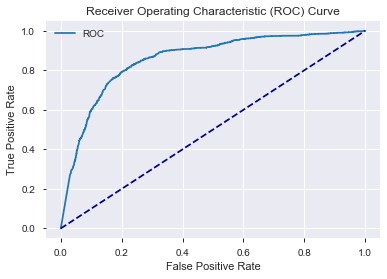

AUC: 0.86


In [58]:
from sklearn import metrics

y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=4, min_samples_leaf=2)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

In [ ]:
#PRINT SOME FURTHER METRICS
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

## Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
# penalty : str, ‘l1’, ‘l2’, ‘elasticnet’ or ‘none’, optional (default=’l2’)
# tol : Tolerance for stopping criteria.
# C : Inverse of regularization strength
# solver : Algorithm to use in the optimization problem{ ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}
# max_iter : Maximum number of iterations taken for the solvers to converge.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
basic_logistic = model.predict(X_test)

In [63]:
from sklearn.metrics import f1_score
print('***RESULTS ON TEST SET***')
print("f1_score: ", f1_score(y_test, basic_logistic))

***RESULTS ON TEST SET***
f1_score:  0.8292115216758801


In [64]:
#DEFINE YOUR CLASSIFIER and THE PARAMETERS GRID
from sklearn.linear_model import LogisticRegression
import numpy as np

classifier = LogisticRegression()
parameters = {"penalty":['l2', 'none'], "C":[1e-4,1e-3,1e-2,1e-1,1,10], "solver":['newton-cg', 'lbfgs', 'sag', 'saga']}

In [65]:
#DEFINE YOUR GRIDSEARCH 
'''
GS perfoms an exhaustive search over specified parameter values for an estimator.
GS uses a Stratified K-Folds cross-validator
(The folds are made by preserving the percentage of samples for each class.)
If refit=True the model is retrained on the whole training set with the best found params
'''
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=20, scoring = 'f1', verbose=10, n_jobs=-1, refit=True)

In [66]:
gs = gs.fit(X_train, y_train)

Fitting 20 folds for each of 48 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   46.5s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   54.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  1

In [87]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.856315 using {'bootstrap': True, 'max_depth': 70, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 150}
0.851842 (0.006818) with: {'bootstrap': True, 'max_depth': 70, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 150}
0.853705 (0.007847) with: {'bootstrap': True, 'max_depth': 70, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 200}
0.853196 (0.007098) with: {'bootstrap': True, 'max_depth': 70, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 250}
0.850236 (0.007733) with: {'bootstrap': True, 'max_depth': 70, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 150}
0.850190 (0.006950) with: {'bootstrap': True, 'max_depth': 70, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 200}
0.850911 (0.007431) with: {'bootstrap': True, 'max_depth': 70, 'max_featur

In [68]:
#TEST ON YOUR TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

In [69]:
#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
from sklearn.metrics import f1_score
print('***RESULTS ON TEST SET***')
print("f1_score: ", f1_score(y_test, y_pred))

***RESULTS ON TEST SET***
f1_score:  0.8304739749927305


In [ ]:
from sklearn.svm import SVC

model = SVC(kernel='linear',C=1, class_weight="balanced")

In [ ]:
#DEFINE YOUR CLASSIFIER and THE PARAMETERS GRID
from sklearn.svm import SVC

classifier = SVC()
parameters = {"kernel":['linear'], "C":[0.1,100],"gamma":[1e-4,0.01,1]}

In [ ]:
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'accuracy', verbose=50, n_jobs=-1, refit=True)

In [ ]:
gs = gs.fit(X_train, y_train)

In [ ]:
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score
print('***RESULTS ON TEST SET***')
print("f1_score: ", f1_score(y_test, y_pred))

## Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [128]:
model_rf = RandomForestClassifier()
parameters = {
    'bootstrap': [True],
    'max_depth': [20], #70
    'max_features': [20],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 3],
    'n_estimators': [112, 115, 117]
}

#{'bootstrap': True, 'max_depth': 20, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 110}

#{'bootstrap': True, 'max_depth': 20, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 115}

# {'bootstrap': True, 'max_depth': 30, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
# {'bootstrap': True, 'max_depth': 70, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 150}

In [129]:
gs = GridSearchCV(model_rf, parameters, cv=10, scoring = 'f1', verbose=10, n_jobs=-1, refit=True)

In [130]:
gs = gs.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   52.8s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  2.3min finished


In [131]:
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.879427 using {'bootstrap': True, 'max_depth': 20, 'max_features': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 115}
0.878921 (0.005642) with: {'bootstrap': True, 'max_depth': 20, 'max_features': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 112}
0.879427 (0.004122) with: {'bootstrap': True, 'max_depth': 20, 'max_features': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 115}
0.879292 (0.004376) with: {'bootstrap': True, 'max_depth': 20, 'max_features': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 117}
0.877291 (0.006366) with: {'bootstrap': True, 'max_depth': 20, 'max_features': 20, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 112}
0.877639 (0.005885) with: {'bootstrap': True, 'max_depth': 20, 'max_features': 20, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 115}
0.876773 (0.006020) with: {'bootstrap': True, 'max_depth': 20, 'max_

In [144]:
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

In [145]:
from sklearn.metrics import f1_score
print('***RESULTS ON TEST SET***')
print("f1_score: ", f1_score(y_test, y_pred))

***RESULTS ON TEST SET***
f1_score:  0.888199633441421


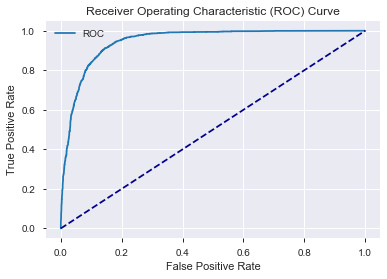

AUC: 0.95


In [146]:
from sklearn import metrics

y_probs = best_model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

In [147]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.82      0.87      3333
           1       0.84      0.95      0.89      3332

    accuracy                           0.88      6665
   macro avg       0.89      0.88      0.88      6665
weighted avg       0.89      0.88      0.88      6665



In [148]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[2722  611]
 [ 182 3150]]


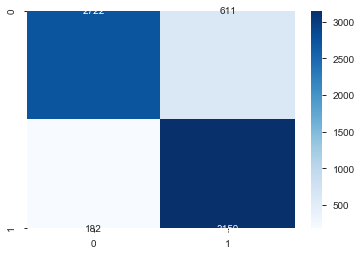

In [149]:
# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues"); #annot=True to annotate cells fmt: format


In [150]:
feature_list = list(X.columns)
# Get numerical feature importances
importances = list(best_model.feature_importances_)# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: marital_status_Married-civ-spouse Importance: 0.24
Variable: education_years      Importance: 0.15
Variable: hours_week           Importance: 0.14
Variable: marital_status_Never-married Importance: 0.08
Variable: age_group_Adult      Importance: 0.04
Variable: sex_Male             Importance: 0.03
Variable: workclass_Private    Importance: 0.02
Variable: occupation_Exec-managerial Importance: 0.02
Variable: occupation_Prof-specialty Importance: 0.02
Variable: occupation_Sales     Importance: 0.02
Variable: relationship_Not-in-family Importance: 0.02
Variable: relationship_Unmarried Importance: 0.02
Variable: age_group_Young Adult Importance: 0.01
Variable: workclass_Local-gov  Importance: 0.01
Variable: workclass_Self-emp-inc Importance: 0.01
Variable: workclass_Self-emp-not-inc Importance: 0.01
Variable: workclass_State-gov  Importance: 0.01
Variable: education_Bachelors  Importance: 0.01
Variable: education_HS-grad    Importance: 0.01
Variable: education_Some-college Import

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]